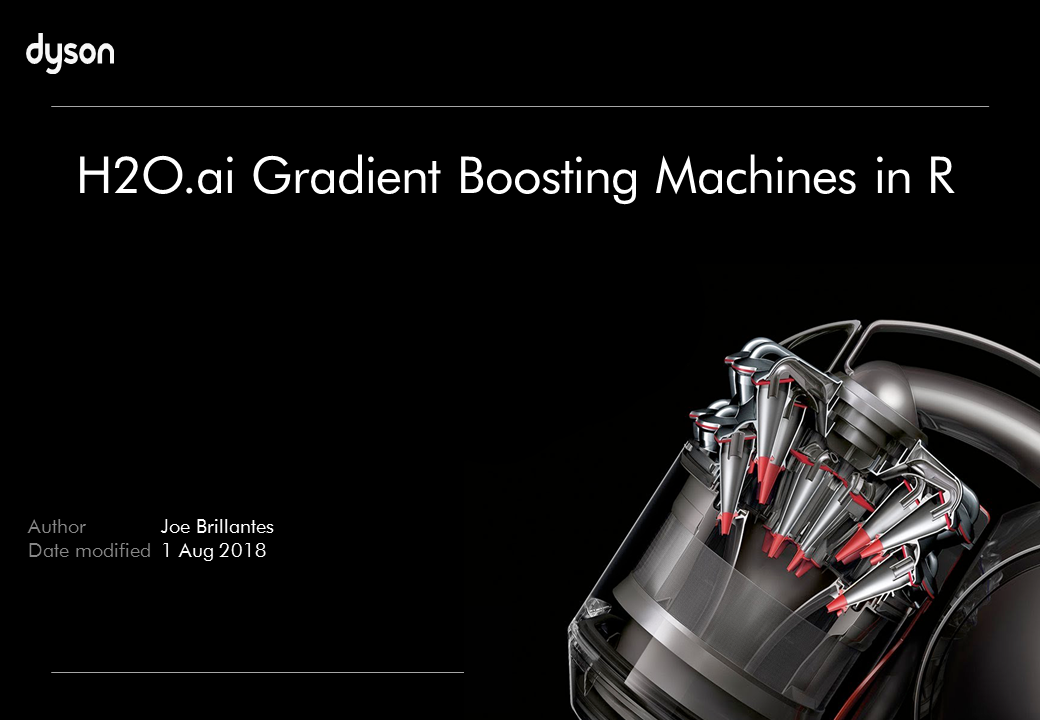

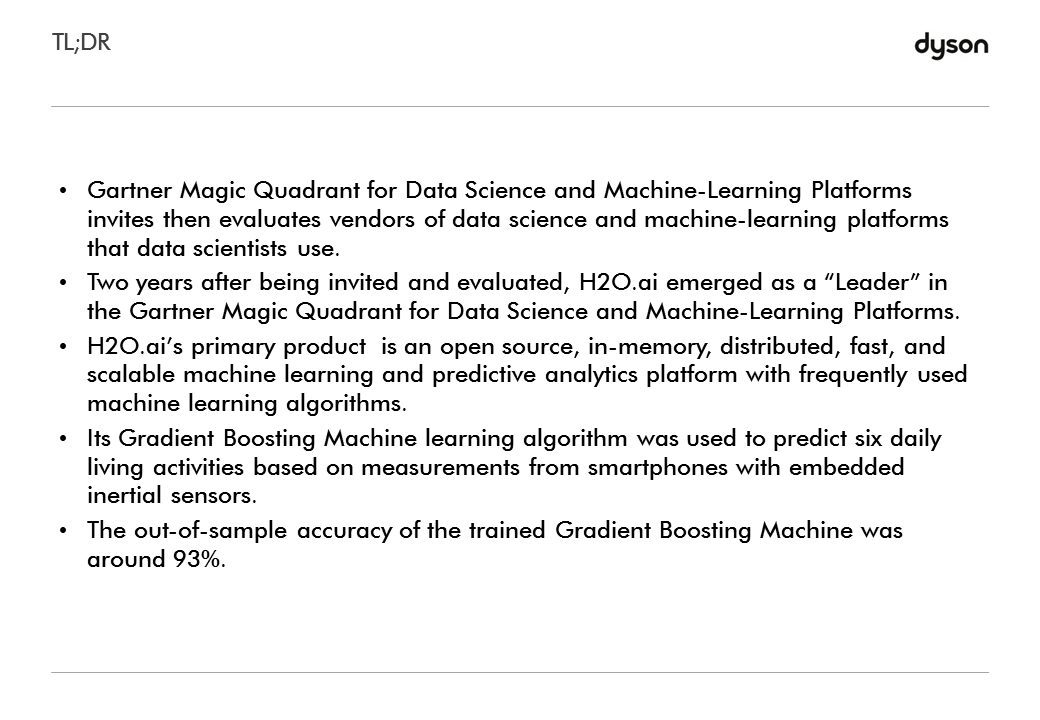

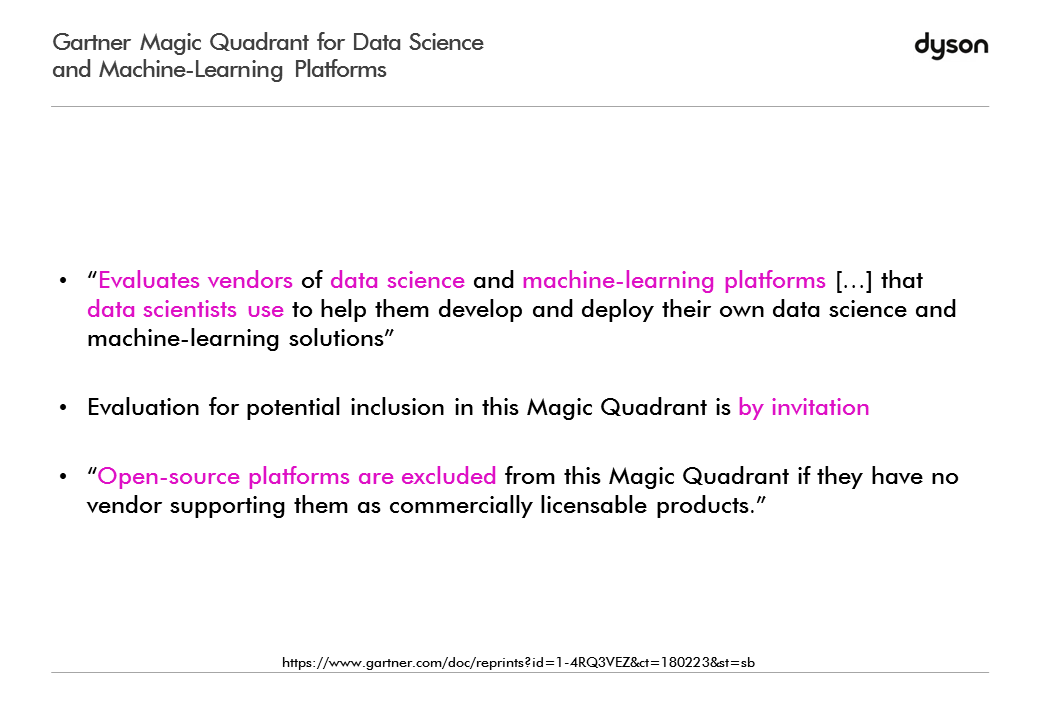

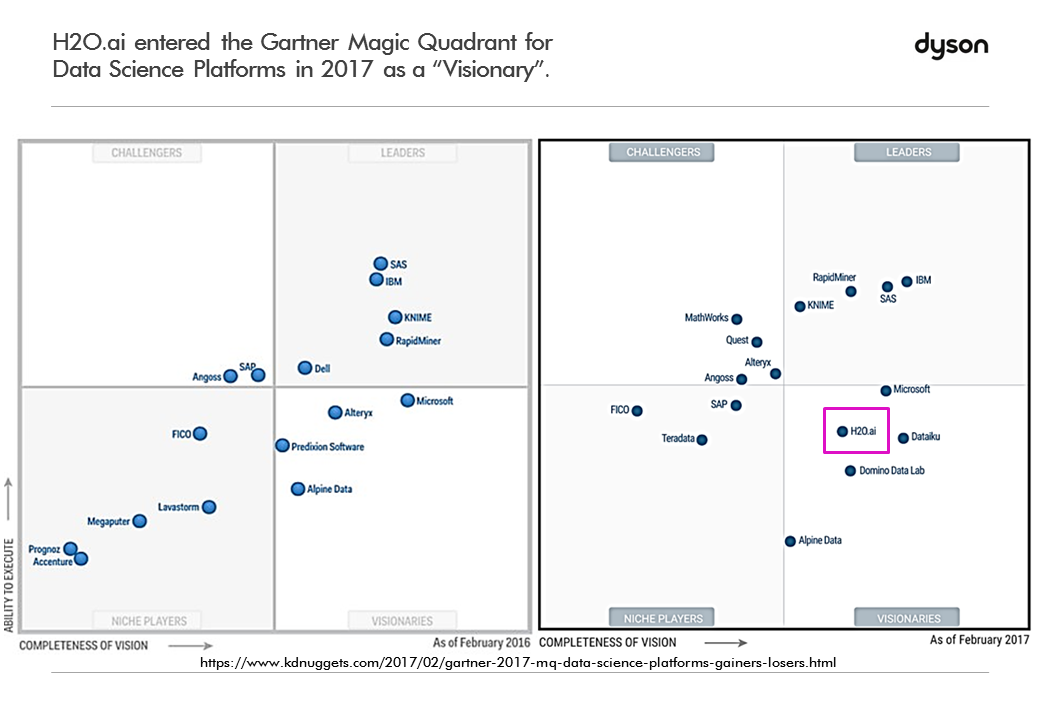

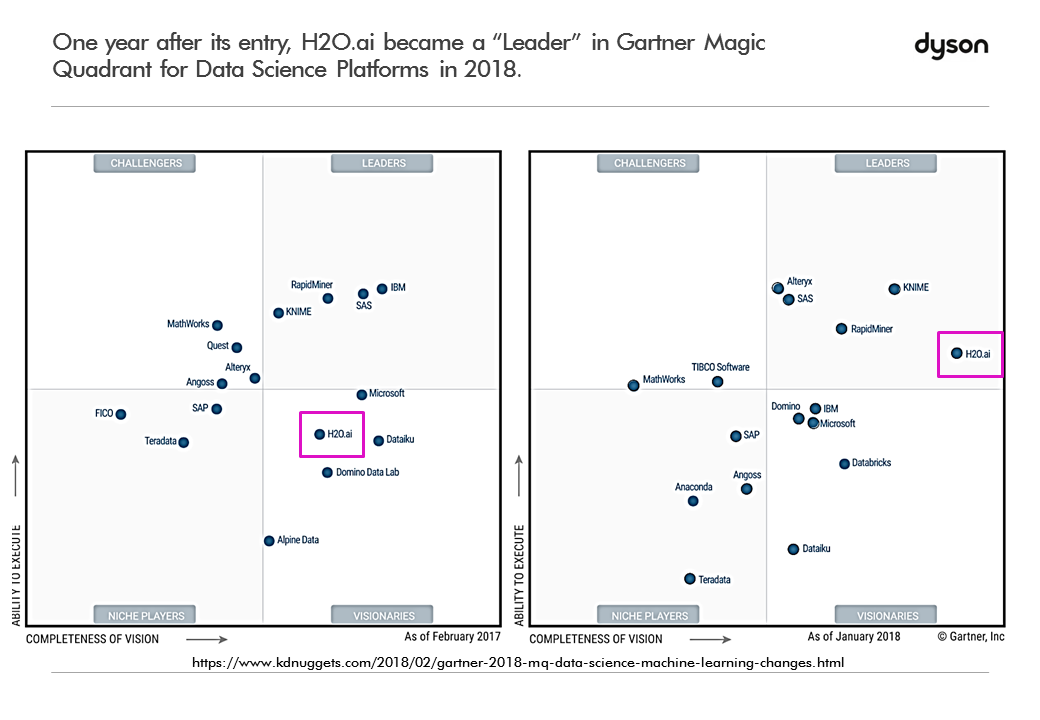

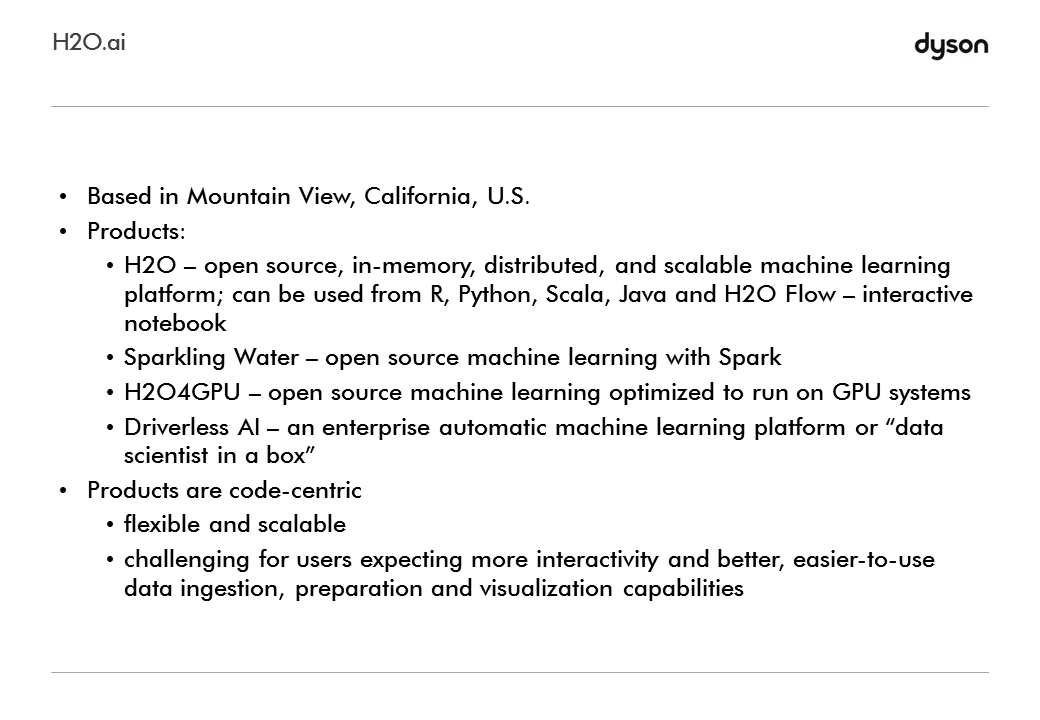

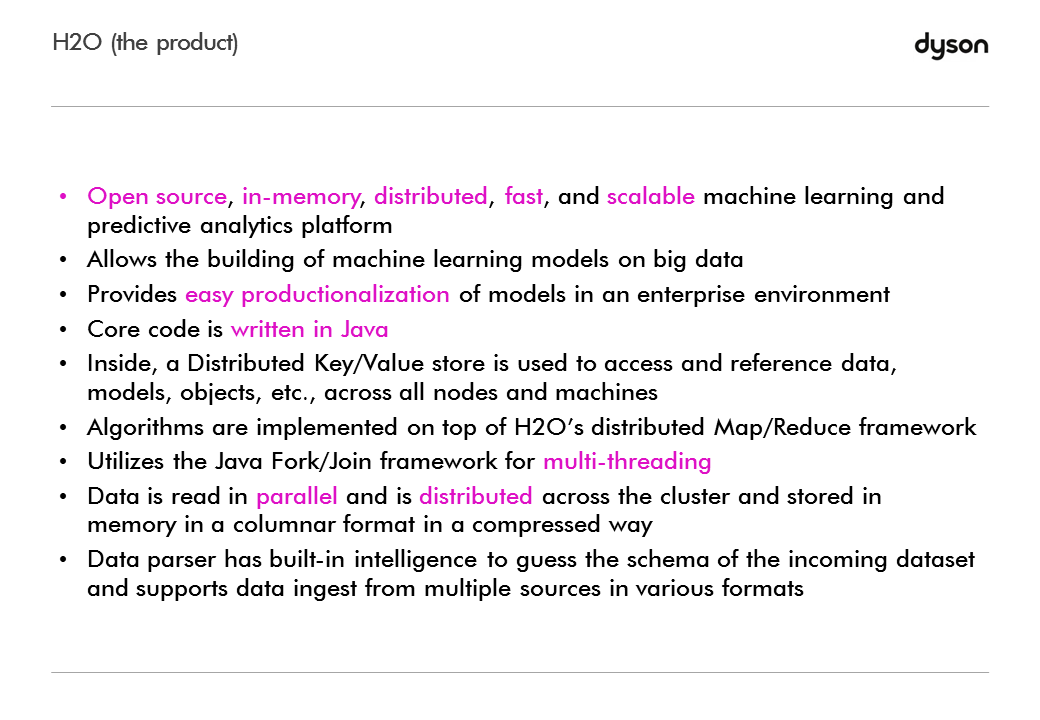

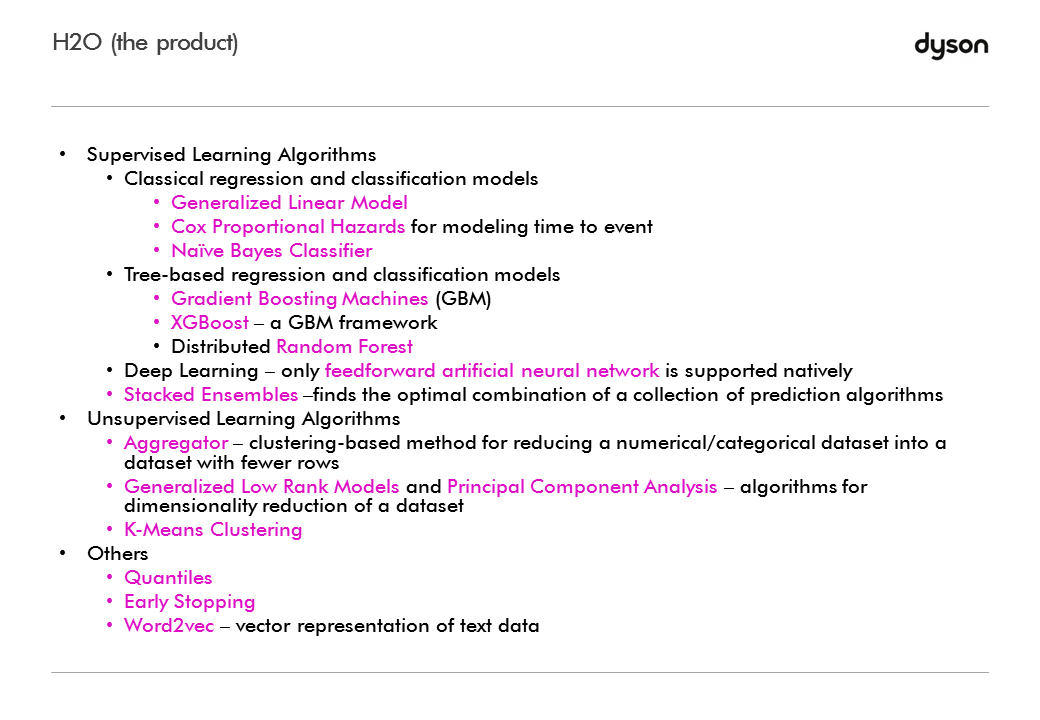

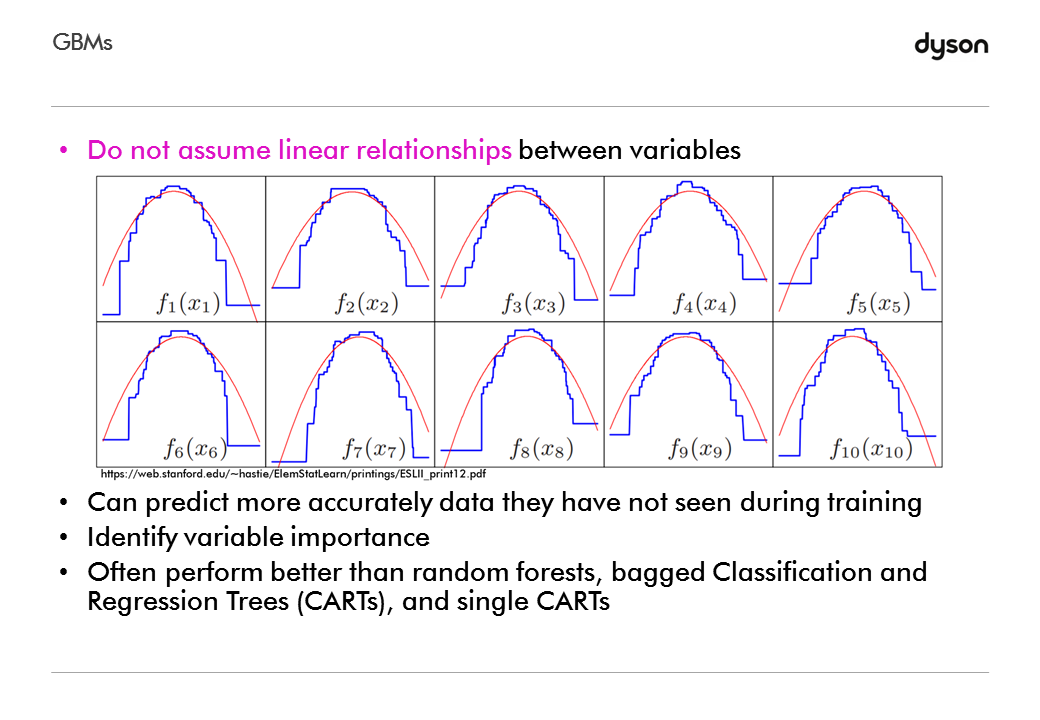

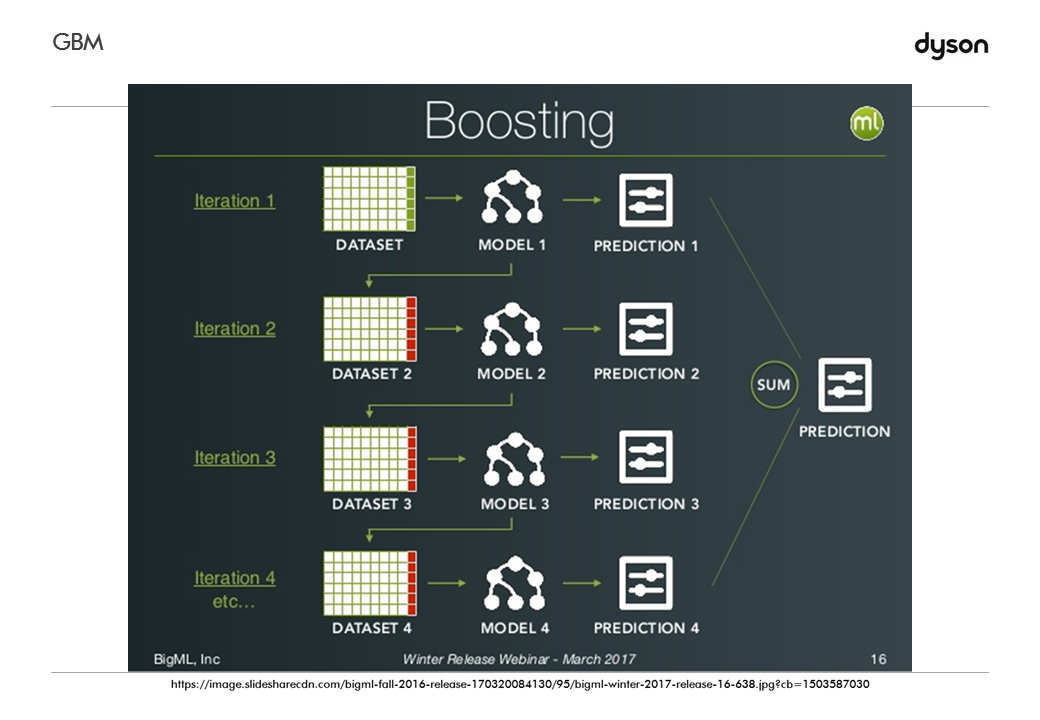

## Trevor Hastie's Lecture on Gradient Boosting Machine Learning
[![Gradient Boosting Machine Learning Lecture](https://img.youtube.com/vi/wPqtzj5VZus/0.jpg)](https://www.youtube.com/watch?v=wPqtzj5VZus)

## System Used
OS: Windows 7<br>R: Microsoft R Open 3.4.1<br>Java: 64-bit JDK 1.8.0_161

## Installing H2O in R and its dependencies

In [1]:
installOrLoadPackage <- function(listOfPackages) {
    repository <- 'https://cloud.r-project.org/'
    for (package in listOfPackages) {
        if (package %in% row.names(installed.packages()) == TRUE) {
            update.packages(package, dependecies = TRUE, repos=repository)
        } else {
            install.packages(package, repos=repository)
        }
        require(package, character.only = TRUE)
    }
}
installOrLoadPackage(c('h2o','RCurl','jsonlite'))

Loading required package: h2o
Warning message:
"package 'h2o' was built under R version 3.4.4"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following object is masked from 'package:RevoScaleR':

    colnames

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc

Loading required package: RCurl
Warning message:
"package 'RCurl' was built under R version 3.4.3"Loading required package: bitops
Lo

## Set the correct Java version to use

In [2]:
Sys.setenv(JAVA_HOME='C:/Program Files/Java/jdk1.8.0_161')

## Initialize H2O
My machine has four cores, but I only used 3. I did not use all the cores of my machine. Otherwise, even switching among windows would have been extremely slow.

In [3]:
localH2O <- h2o.init(nthreads = 3)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\JBRILL~1\AppData\Local\Temp\RtmpCktwSC/h2o_jbrillantes_started_from_r.out
    C:\Users\JBRILL~1\AppData\Local\Temp\RtmpCktwSC/h2o_jbrillantes_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 913 milliseconds 
    H2O cluster version:        3.16.0.2 
    H2O cluster version age:    8 months and 3 days !!! 
    H2O cluster name:           H2O_started_from_R_jbrillantes_jae688 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.48 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  3 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Algos, AutoML, Core V3,

Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (8 months and 3 days)!
Please download and install the latest version from http://h2o.ai/download/"

## Describe the Human Activity Recognition Using Smartphones Data Set

It is "built from the recordings of 30 subjects performing activities of daily living while carrying a waist-mounted smartphone with embedded inertial sensors". The data set has 10,299 instances of 561 features. The features come from the accelerometer and gyroscope 3-axial raw signals. I used a Gradient Boosting Model to predict the human activities of walking, walking upstairs, walking downstairs, sitting, standing, and laying from the 561 features. (http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

## Load  the data in R
I downloaded the data from http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip. The training and testing sets are fixed-width text files. The file that contains the column headers of the features are comma-separated text files.

In [4]:
## Download the file ##
temp01 <- tempfile()
download.file('http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip',temp01)

## Unzip and load the features ##
trainX <- read.fwf(unz(temp01, 'UCI HAR Dataset/train/X_train.txt'), widths=rep(16, 561), header=FALSE)
testX  <- read.fwf(unz(temp01, 'UCI HAR Dataset/test/X_test.txt'  ), widths=rep(16, 561), header=FALSE)

## Unzip and load the activities ##
trainY <- read.fwf(unz(temp01, 'UCI HAR Dataset/train/y_train.txt'), widths=16, header=FALSE)
testY  <- read.fwf(unz(temp01, 'UCI HAR Dataset/test/y_test.txt'  ), widths=16, header=FALSE)

## Unzip the file that contains feature names, and make the column names to be feature names ##
features <- read.csv(unz(temp01, 'UCI HAR Dataset/features.txt'), header=FALSE, sep=' ')
features <- paste(features$V2, formatC(features$V1, width = 3, format = "d", flag = "0"), sep='_')
colnames(trainX) <- features
colnames(testX)  <- features

unlink(temp01)

## Combine the feature matrices and the activities vectors ##
trainSet <- cbind(trainY, trainX)
colnames(trainSet)[1] <- 'Activity'
trainSet$Activity <- as.factor(trainSet$Activity)
testSet <- cbind(testY, testX)
colnames(testSet)[1] <- 'Activity'
testSet$Activity <- as.factor(testSet$Activity)

trainSet
str(trainSet)

Activity,tBodyAcc-mean()-X_001,tBodyAcc-mean()-Y_002,tBodyAcc-mean()-Z_003,tBodyAcc-std()-X_004,tBodyAcc-std()-Y_005,tBodyAcc-std()-Z_006,tBodyAcc-mad()-X_007,tBodyAcc-mad()-Y_008,tBodyAcc-mad()-Z_009,...,fBodyBodyGyroJerkMag-meanFreq()_552,fBodyBodyGyroJerkMag-skewness()_553,fBodyBodyGyroJerkMag-kurtosis()_554,"angle(tBodyAccMean,gravity)_555","angle(tBodyAccJerkMean),gravityMean)_556","angle(tBodyGyroMean,gravityMean)_557","angle(tBodyGyroJerkMean,gravityMean)_558","angle(X,gravityMean)_559","angle(Y,gravityMean)_560","angle(Z,gravityMean)_561"
5,0.2885845,-0.020294171,-0.13290514,-0.9952786,-0.9831106,-0.9135264,-0.9951121,-0.9831846,-0.9235270,...,-0.07432303,-0.29867637,-0.71030407,-0.112754340,0.030400372,-0.464761390,-0.018445884,-0.8412468,0.17994061,-0.05862692
5,0.2784188,-0.016410568,-0.12352019,-0.9982453,-0.9753002,-0.9603220,-0.9988072,-0.9749144,-0.9576862,...,0.15807454,-0.59505094,-0.86149931,0.053476955,-0.007434566,-0.732626210,0.703510590,-0.8447876,0.18028889,-0.05431672
5,0.2796531,-0.019467156,-0.11346169,-0.9953796,-0.9671870,-0.9789440,-0.9965199,-0.9636684,-0.9774686,...,0.41450281,-0.39074815,-0.76010372,-0.118559260,0.177899480,0.100699210,0.808529080,-0.8489335,0.18063731,-0.04911782
5,0.2791739,-0.026200646,-0.12328257,-0.9960915,-0.9834027,-0.9906751,-0.9970995,-0.9827498,-0.9893025,...,0.40457253,-0.11729020,-0.48284451,-0.036787973,-0.012892494,0.640011040,-0.485366450,-0.8486494,0.18193476,-0.04766318
5,0.2766288,-0.016569655,-0.11536185,-0.9981386,-0.9808173,-0.9904816,-0.9983211,-0.9796719,-0.9904411,...,0.08775301,-0.35147093,-0.69920515,0.123320050,0.122541960,0.693578290,-0.615970610,-0.8478653,0.18515116,-0.04389225
5,0.2771988,-0.010097850,-0.10513725,-0.9973350,-0.9904868,-0.9954200,-0.9976274,-0.9902177,-0.9955489,...,0.01995331,-0.54541011,-0.84461930,0.082632155,-0.143439010,0.275040750,-0.368224040,-0.8496316,0.18482251,-0.04212638
5,0.2794539,-0.019640776,-0.11002215,-0.9969210,-0.9671859,-0.9831178,-0.9970027,-0.9660967,-0.9831163,...,0.14584351,-0.21719818,-0.56443048,-0.212754060,-0.230621930,0.014636690,-0.189511530,-0.8521502,0.18216997,-0.04300999
5,0.2774325,-0.030488303,-0.12536043,-0.9965593,-0.9667284,-0.9815853,-0.9964852,-0.9663131,-0.9829818,...,0.13638192,-0.08230697,-0.42171544,-0.020888015,0.593995810,-0.561870670,0.467383330,-0.8510167,0.18377851,-0.04197583
5,0.2772934,-0.021750698,-0.12075082,-0.9973285,-0.9612453,-0.9836716,-0.9975958,-0.9572362,-0.9843793,...,0.31403783,-0.26940126,-0.57299535,0.012954021,0.080936389,-0.234312630,0.117797010,-0.8479715,0.18898248,-0.03736393
5,0.2805857,-0.009960298,-0.10606516,-0.9948034,-0.9727584,-0.9862439,-0.9954046,-0.9736632,-0.9856419,...,0.26738250,0.33952607,0.14045152,-0.020589646,-0.127730180,-0.482870540,-0.070670135,-0.8482944,0.19031033,-0.03441729


'data.frame':	7352 obs. of  562 variables:
 $ Activity                                : Factor w/ 6 levels "1","2","3","4",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ tBodyAcc-mean()-X_001                   : num  0.289 0.278 0.28 0.279 0.277 ...
 $ tBodyAcc-mean()-Y_002                   : num  -0.0203 -0.0164 -0.0195 -0.0262 -0.0166 ...
 $ tBodyAcc-mean()-Z_003                   : num  -0.133 -0.124 -0.113 -0.123 -0.115 ...
 $ tBodyAcc-std()-X_004                    : num  -0.995 -0.998 -0.995 -0.996 -0.998 ...
 $ tBodyAcc-std()-Y_005                    : num  -0.983 -0.975 -0.967 -0.983 -0.981 ...
 $ tBodyAcc-std()-Z_006                    : num  -0.914 -0.96 -0.979 -0.991 -0.99 ...
 $ tBodyAcc-mad()-X_007                    : num  -0.995 -0.999 -0.997 -0.997 -0.998 ...
 $ tBodyAcc-mad()-Y_008                    : num  -0.983 -0.975 -0.964 -0.983 -0.98 ...
 $ tBodyAcc-mad()-Z_009                    : num  -0.924 -0.958 -0.977 -0.989 -0.99 ...
 $ tBodyAcc-max()-X_010                    : num  -0.

## Load dataset in H2O

In [5]:
trainSet.hex <- as.h2o(x=trainSet, 'trainSet.hex')
testSet.hex  <- as.h2o(x=testSet,  'testSet.hex' )

  |======================================================================| 100%
  |======================================================================| 100%


## Perform hyper-parameter search and cross-validation
This took five hours!

In [6]:
hyper_params <- list(max_depth = c(3,8,21),
                     ntrees = c(10,50,100),
                     learn_rate = c(0.01,0.025,0.08,0.1))
gbmGrid <- h2o.grid(x = features, 
                    y = 'Activity',
                    algorithm='gbm',
                    distribution='multinomial',
                    hyper_params = hyper_params,
                    learn_rate_annealing = 0.99,
                    training_frame = trainSet.hex,
                    nfolds = 10,
                    sample_rate = 0.8,
                    col_sample_rate = 0.8,
                    search_criteria = list(strategy = "RandomDiscrete",
                                           max_models = 10),
                    grid_id="depth_grid")

  |======================================================================| 100%


## Get the best model found in the hyper-parameter search

In [7]:
sortedGrid <- h2o.getGrid('depth_grid', sort_by='logloss', decreasing=FALSE)
sortedGrid
gb.model <- h2o.getModel(sortedGrid@model_ids[[1]])

H2O Grid Details

Grid ID: depth_grid 
Used hyper parameters: 
  -  learn_rate 
  -  max_depth 
  -  ntrees 
Number of models: 10 
Number of failed models: 0 

Hyper-Parameter Search Summary: ordered by increasing logloss
   learn_rate max_depth ntrees          model_ids              logloss
1        0.08         8    100 depth_grid_model_5 0.028241847820678092
2         0.1        21     50 depth_grid_model_6  0.03589931570661682
3        0.08         8     50 depth_grid_model_1  0.04847479646790094
4        0.08         3     50 depth_grid_model_9  0.10872806755548599
5       0.025         3    100 depth_grid_model_0   0.2693467738391699
6         0.1        21     10 depth_grid_model_4  0.34023852698606966
7        0.01        21    100 depth_grid_model_7   0.5716451184540245
8        0.01         8    100 depth_grid_model_3   0.5747319803420865
9       0.025        21     10 depth_grid_model_2   1.0747355737682518
10      0.025         3     10 depth_grid_model_8    1.1527674605994

## Check model performance on testing set

In [8]:
pred.hex <- h2o.predict(gb.model, testSet.hex)
table(as.data.frame(pred.hex)[[1]], as.data.frame(testSet.hex['Activity'])[[1]])

  |======================================================================| 100%


   
      1   2   3   4   5   6
  1 480  27  10   0   0   0
  2  11 438  28   2   0   0
  3   5   5 382   0   0   0
  4   0   1   0 403  32   0
  5   0   0   0  86 500   0
  6   0   0   0   0   0 537

## Display variable importance

In [9]:
h2o.varimp(gb.model)

variable,relative_importance,scaled_importance,percentage
tGravityAcc-min()-X_053,6054.8584,1.00000000,0.204633563
"angle(Y,gravityMean)_560",1918.9995,0.31693549,0.064855639
tGravityAcc-mean()-X_041,1581.3872,0.26117658,0.053445494
tBodyGyroJerk-mad()-X_167,1577.8710,0.26059585,0.053326657
tBodyAcc-max()-X_010,1490.8254,0.24621970,0.050384815
fBodyAccMag-energy()_509,1271.3119,0.20996559,0.042966006
fBodyAccMag-std()_504,1148.1180,0.18961931,0.038802474
fBodyAcc-skewness()-X_297,1018.1503,0.16815427,0.034410007
tGravityAcc-mean()-Y_042,768.0775,0.12685308,0.025958398
"tGravityAcc-arCoeff()-Z,2_075",684.8353,0.11310508,0.023145096


## Shutdown H2O initialization

In [10]:
h2o.shutdown(prompt = FALSE)

[1] TRUE